In [2]:
%config InlineBackend.figure_formats = ['retina']

import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [3]:
oscars_df = pd.read_csv('oscar_movies_data_2.csv')

In [4]:
oscars_df.columns

Index(['Unnamed: 0', 'IMDBId', 'movie title', 'language', 'country',
       'runtime (mins)', 'mpaarating', 'metacritic score', 'budget',
       'distributionCompany',
       ...
       'Writer_Aaron Sorkin', 'Writer_Anthony McCarten',
       'Writer_George Miller', 'Writer_Joel Coen', 'Writer_John Logan',
       'Writer_Lawrence Kasdan', 'Writer_Paul Thomas Anderson',
       'Writer_Pedro Almodóvar', 'Writer_Quentin Tarantino',
       'Writer_Woody Allen'],
      dtype='object', length=111)

In [5]:
oscars_df.drop_duplicates(subset='IMDBId',inplace=True)
oscars_df.drop(columns = 'Unnamed: 0',inplace=True)

In [6]:
top_ten = oscars_df['writer1'].value_counts().iloc[:5]
mask = oscars_df['writer1'].isin(top_ten.index)
top_writers = oscars_df['writer1'][mask]

Text(0.5, 0, 'Metacritic Score')

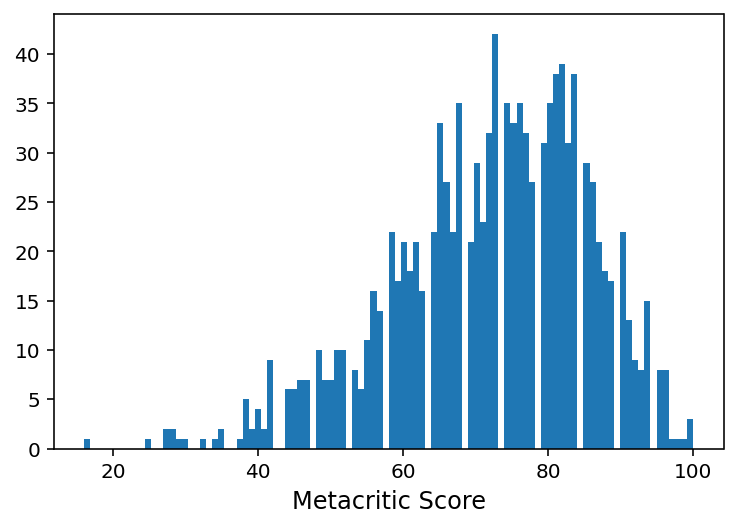

In [7]:
plt.hist(oscars_df["metacritic score"],bins=100);
plt.xlabel('Metacritic Score',fontsize=12)

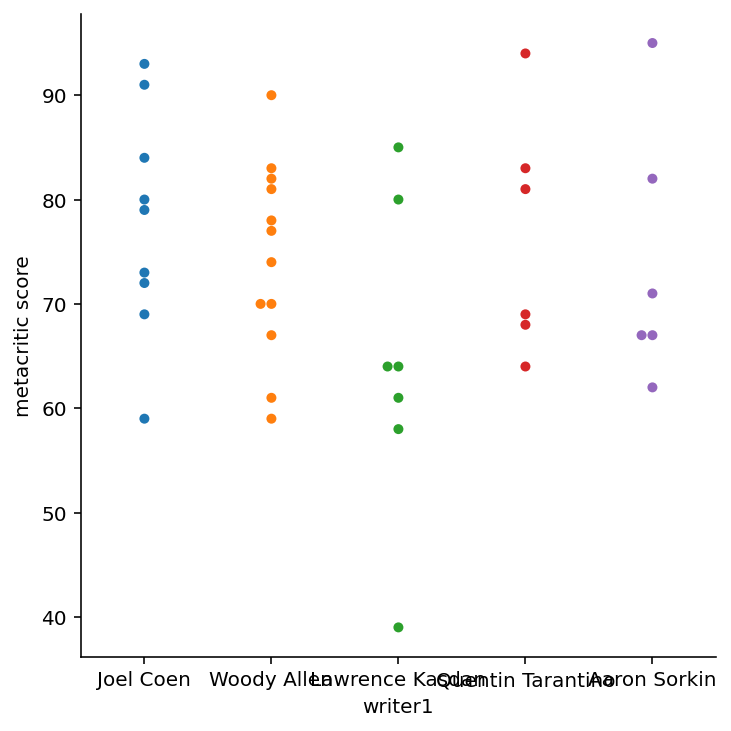

In [8]:
sns.catplot(data=oscars_df, kind="swarm", x=top_writers, y="metacritic score")

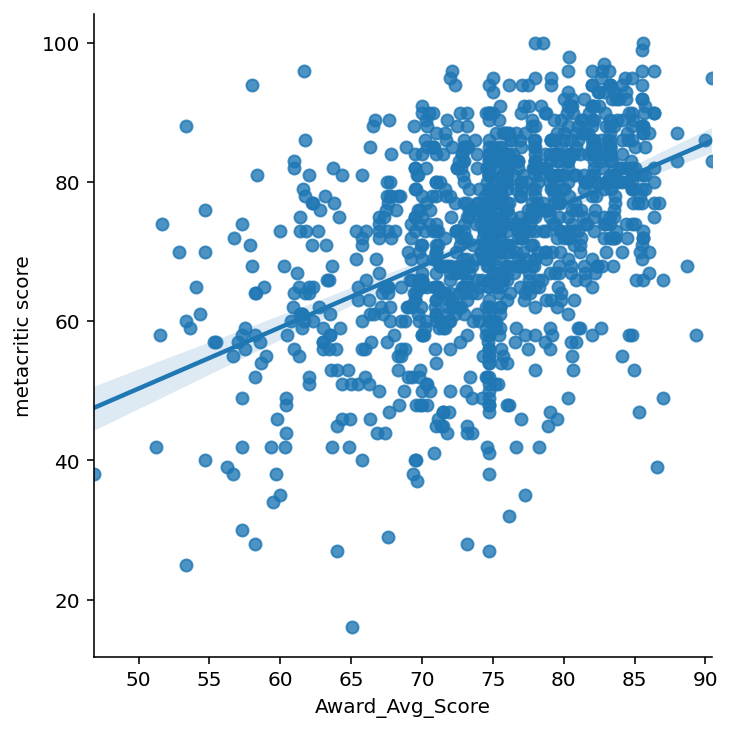

In [10]:
ax = sns.lmplot(x="Award_Avg_Score", y="metacritic score", data=oscars_df)

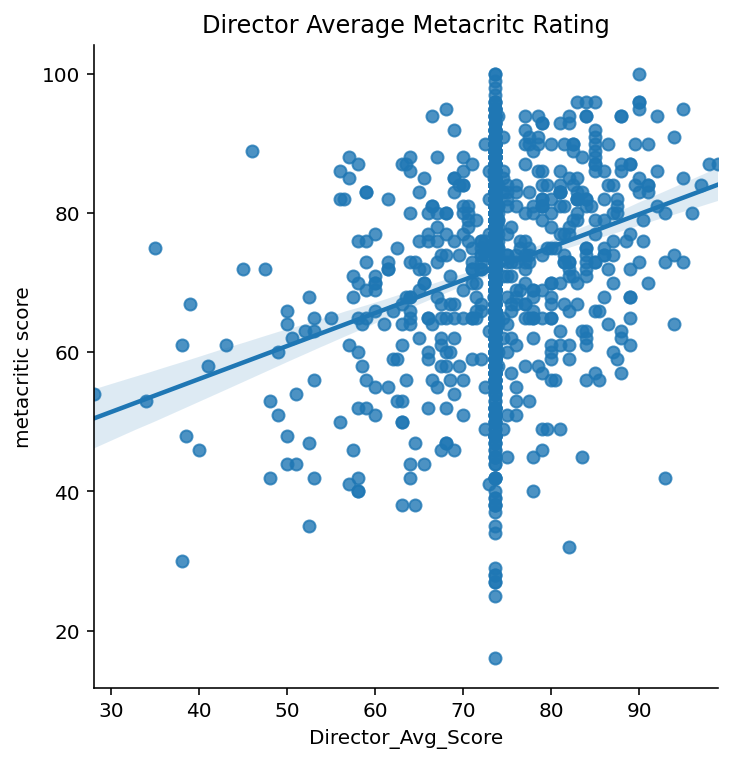

In [11]:
ax = sns.lmplot(x="Director_Avg_Score", y="metacritic score", data=oscars_df)
plt.title('Director Average Metacritc Rating')
ax.savefig('Avg_Score_dir.png')

In [12]:
oscars_df[oscars_df['director']=='Martin Scorsese'][['movie title','Awards','metacritic score',"Director_Avg_Score"]]

,movie title,Awards,metacritic score,Director_Avg_Score
20,The Age of Innocence,Best Actress in a Supporting Role,90.0,81.500000
51,The Aviator,Best Motion Picture of the Year,77.0,73.000000
72,The Irishman,Best Motion Picture of the Year,94.0,77.000000
142,The Last Temptation of Christ,Best Director,80.0,83.000000
222,The Departed,Best Motion Picture of the Year,85.0,74.500000
230,Hugo,Best Motion Picture of the Year,83.0,81.000000
328,Gangs of New York,Best Picture,72.0,73.500000
362,The Color of Money,Best Actor in a Leading Role,77.0,89.000000
437,Raging Bull,Best Actor in a Leading Role,89.0,73.607075
522,Casino,Best Actress in a Leading Role,73.0,81.500000


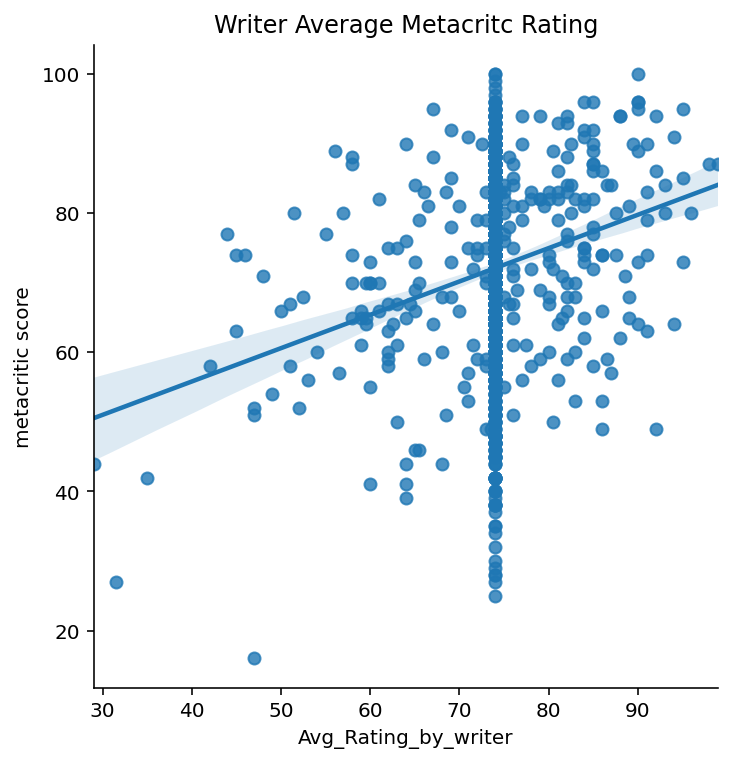

In [13]:
ax=sns.lmplot(x='Avg_Rating_by_writer', y="metacritic score", data=oscars_df)
plt.title('Writer Average Metacritc Rating')
ax.savefig('Avg_Score_rating.png')

In [14]:
oscars_df[oscars_df['writer1']=='Quentin Tarantino'][['movie title','Awards','metacritic score',"Avg_Rating_by_writer"]]

,movie title,Awards,metacritic score,Avg_Rating_by_writer
63,Inglourious Basterds,Best Motion Picture of the Year,69.0,79.000000
190,Once Upon a Time... in Hollywood,Best Motion Picture of the Year,83.0,74.500000
231,The Hateful Eight,Best Performance by an Actress in a Supporting...,68.0,75.000000
260,Django Unchained,Best Motion Picture of the Year,81.0,66.500000
271,Jackie Brown,Best Actor in a Supporting Role,64.0,94.000000
651,Pulp Fiction,Best Actor in a Leading Role,94.0,73.942529
